In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# **Data Exploration and Preprocessing**

In [ ]:
df = pd.read_csv('train.csv')
test_df_original = pd.read_csv('test.csv')

In [ ]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis
0,869691,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,...,91.93,591.7,0.1385,0.4092,0.45040,0.18650,0.5774,0.10300,NaN,M
1,898677,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,NaN,B
2,852973,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,...,149.30,1269.0,0.1641,0.6110,0.63350,0.20240,0.4027,0.09876,NaN,M
3,914580,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,...,92.82,607.3,0.1276,0.2506,0.20280,0.10530,0.3035,0.07661,NaN,B
4,886776,15.32,17.27,103.20,713.3,0.13350,0.22840,0.24480,0.12420,0.2398,...,119.80,928.8,0.1765,0.4503,0.44290,0.22290,0.3258,0.11910,NaN,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,0.0
mean,2.983734e+07,14.183236,19.274171,92.345377,660.460553,0.096540,0.104395,0.090043,0.049586,0.181707,...,25.607663,107.907688,891.912563,0.132461,0.254167,0.276683,0.116187,0.291139,0.083802,NaN
std,1.278476e+08,3.548961,4.119494,24.438949,351.641745,0.014136,0.051625,0.080718,0.039031,0.027905,...,5.947946,33.937742,577.586383,0.021980,0.148297,0.209022,0.064881,0.060838,0.016672,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,...,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.666840e+05,11.717500,16.345000,75.467500,421.275000,0.086755,0.066712,0.030090,0.020710,0.161925,...,21.392500,84.430000,516.425000,0.117275,0.147325,0.117125,0.065600,0.252625,0.072310,NaN
50%,9.052360e+05,13.445000,18.895000,86.965000,556.950000,0.095825,0.094740,0.064905,0.033950,0.180050,...,25.300000,99.165000,700.650000,0.131350,0.217000,0.238900,0.105350,0.282800,0.079960,NaN
75%,8.810979e+06,16.115000,21.695000,106.525000,802.025000,0.106075,0.130500,0.132050,0.074112,0.196550,...,29.425000,127.100000,1143.500000,0.145900,0.342675,0.386400,0.166075,0.320600,0.092075,NaN
max,9.113205e+08,27.420000,33.810000,186.900000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.200600,0.932700,1.252000,0.291000,0.577400,0.148600,NaN


In [ ]:
df.isnull().sum()

,0
id,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
df = df.drop(columns=['id', 'Unnamed: 32'])
test_df = test_df_original.drop(columns=['id', 'Unnamed: 32'])

In [ ]:
df.isnull().sum()

,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0
fractal_dimension_mean,0


In [ ]:
df.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.07415,0.2678,0.07371,...,26.38,91.93,591.7,0.1385,0.40920,0.45040,0.18650,0.5774,0.10300,M
1,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,19.48,70.89,357.1,0.1360,0.16360,0.07162,0.04074,0.2434,0.08488,B
2,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,...,36.71,149.30,1269.0,0.1641,0.61100,0.63350,0.20240,0.4027,0.09876,M
3,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,24.34,92.82,607.3,0.1276,0.25060,0.20280,0.10530,0.3035,0.07661,B
4,15.32,17.27,103.20,713.3,0.13350,0.22840,0.24480,0.12420,0.2398,0.07596,...,22.66,119.80,928.8,0.1765,0.45030,0.44290,0.22290,0.3258,0.11910,M
5,11.68,16.17,75.49,420.5,0.11280,0.09263,0.04279,0.03132,0.1853,0.06401,...,21.59,86.57,549.8,0.1526,0.14770,0.14900,0.09815,0.2804,0.08024,B
6,12.23,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.06013,...,28.36,92.15,638.4,0.1429,0.20420,0.13770,0.10800,0.2668,0.08174,B
7,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.70,711.2,0.1440,0.17730,0.23900,0.12880,0.2977,0.07259,B
8,10.51,23.09,66.85,334.2,0.10150,0.06797,0.02495,0.01875,0.1695,0.06556,...,24.22,70.10,362.7,0.1143,0.08614,0.04158,0.03125,0.2227,0.06777,B
9,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283,B


# **Exploratory Data Analysis**

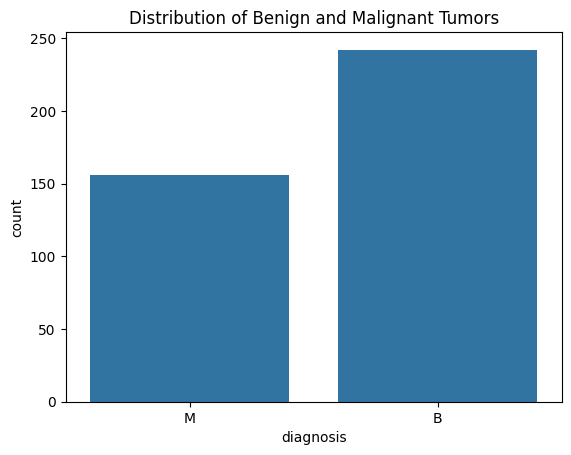

In [ ]:
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Benign and Malignant Tumors')
plt.show()

In [ ]:
mean_features = [col for col in df.columns if 'mean' in col] + ['diagnosis']
se_features = [col for col in df.columns if 'se' in col] + ['diagnosis']
worst_features = [col for col in df.columns if 'worst' in col] + ['diagnosis']

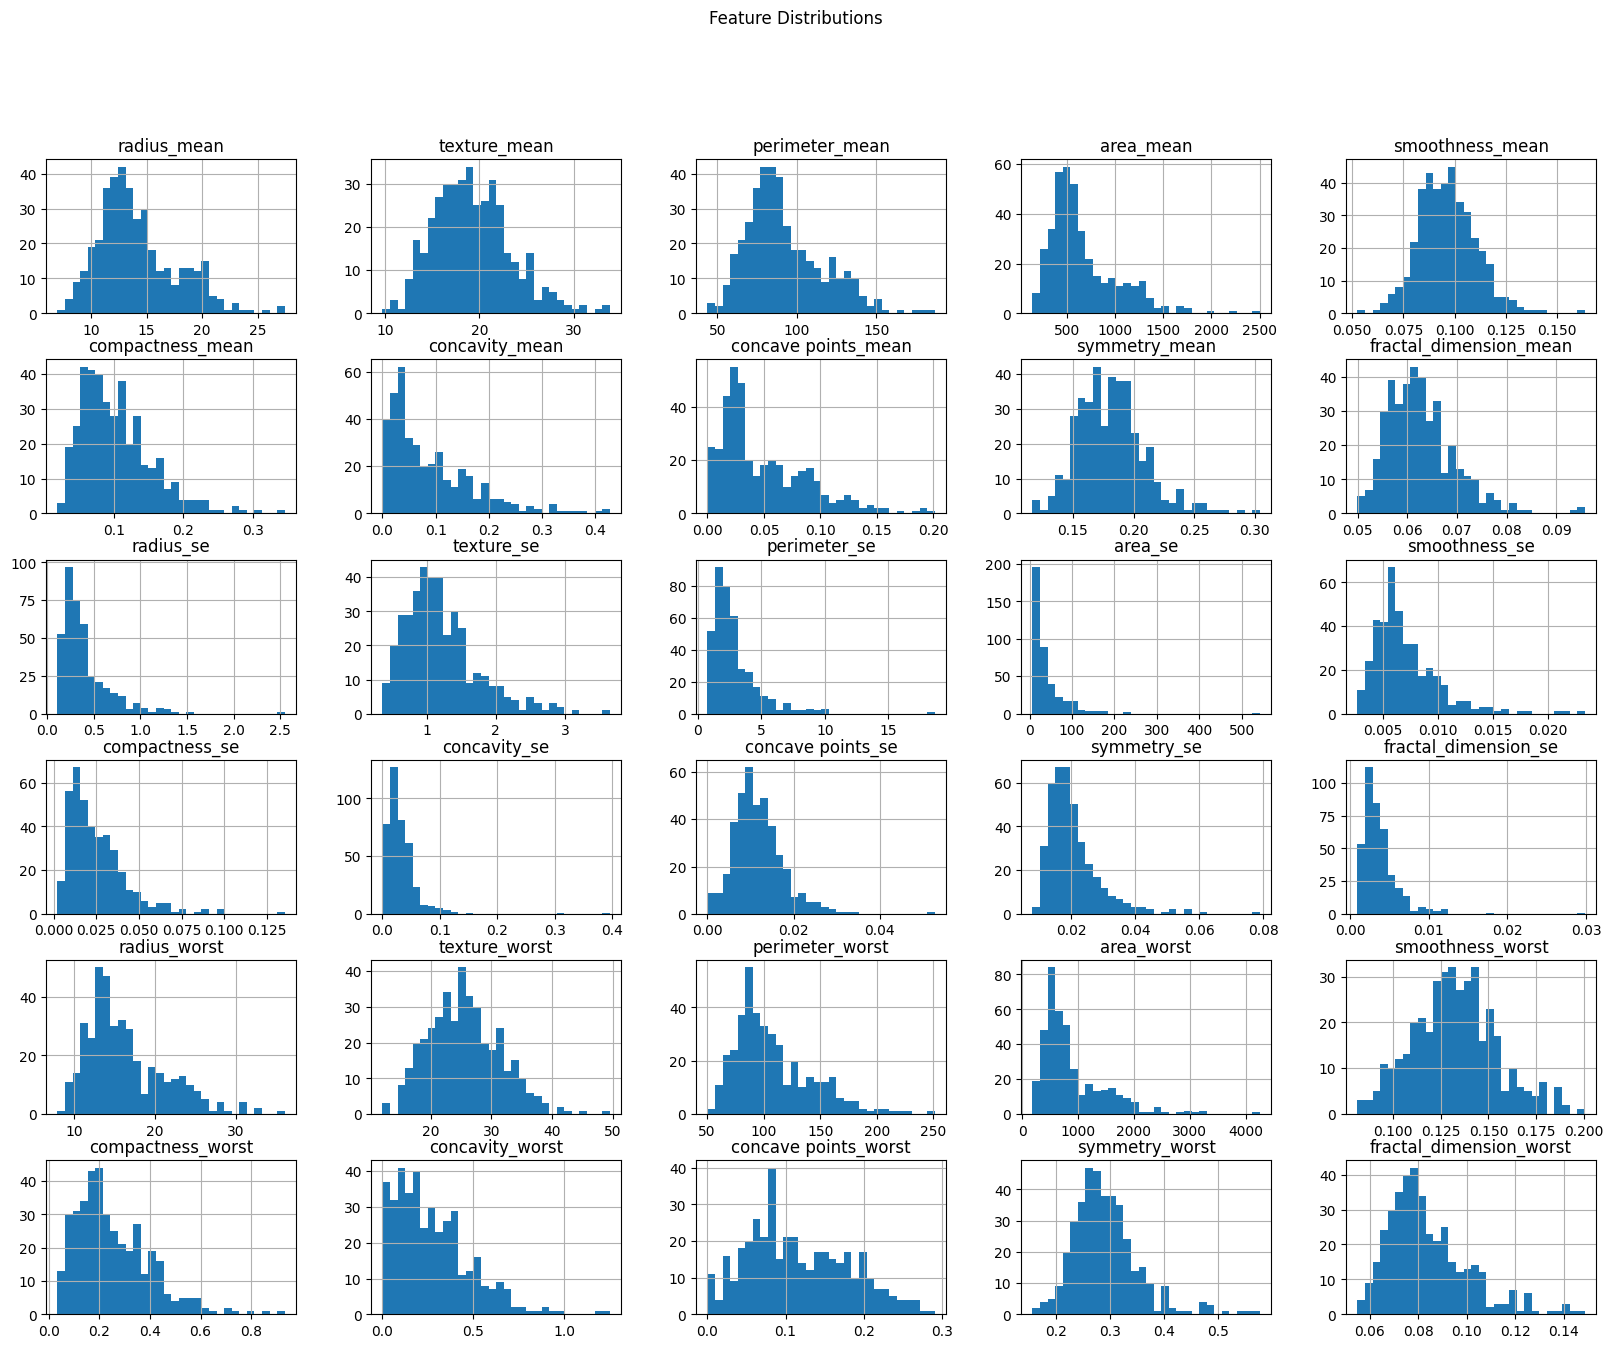

In [ ]:
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Feature Distributions')
plt.show()

In [ ]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

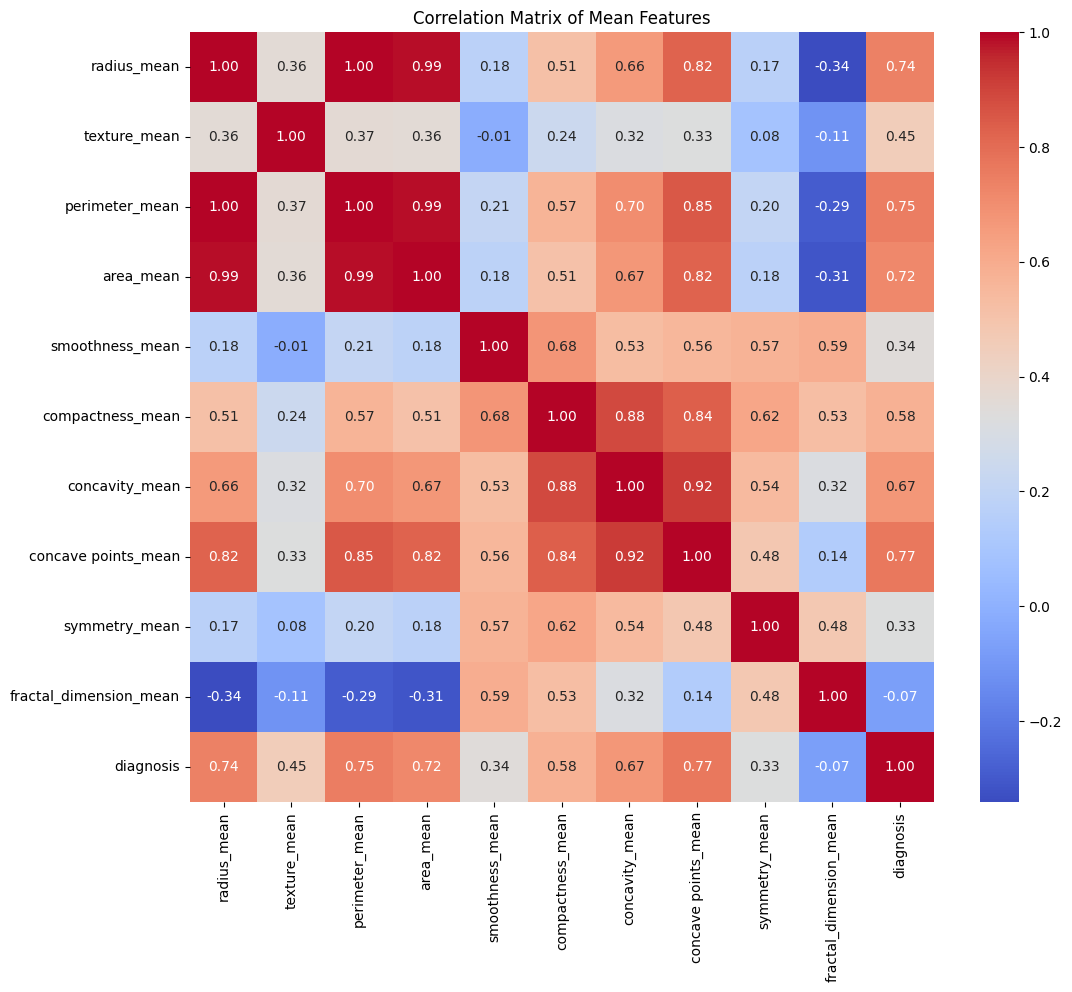

In [ ]:
correlation_matrix = df[mean_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Mean Features')
plt.show()

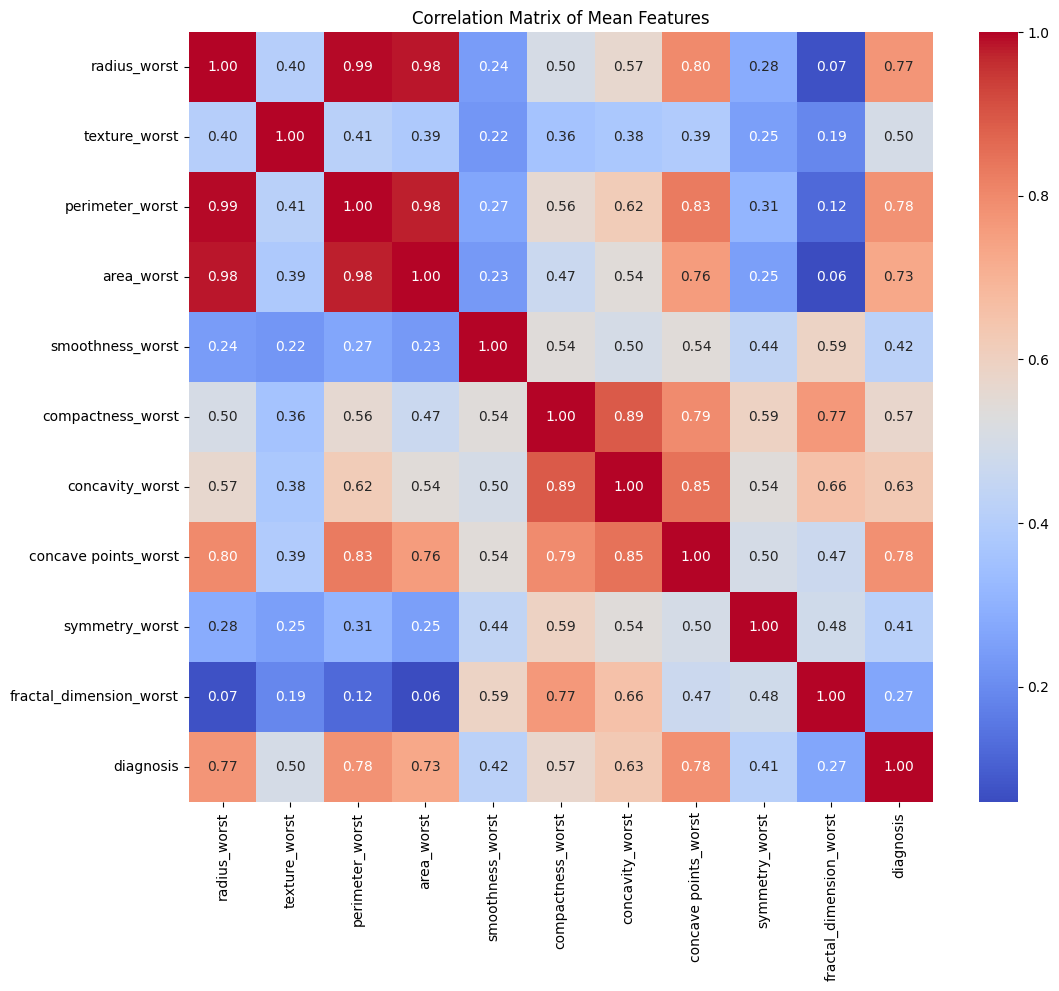

In [ ]:
correlation_matrix = df[worst_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Mean Features')
plt.show()

<ipython-input-20-5d3ebc1b7f6a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y='radius_mean', data=df, palette='coolwarm', inner=None, alpha=0.5)
<ipython-input-20-5d3ebc1b7f6a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='Set2', width=0.3)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureW

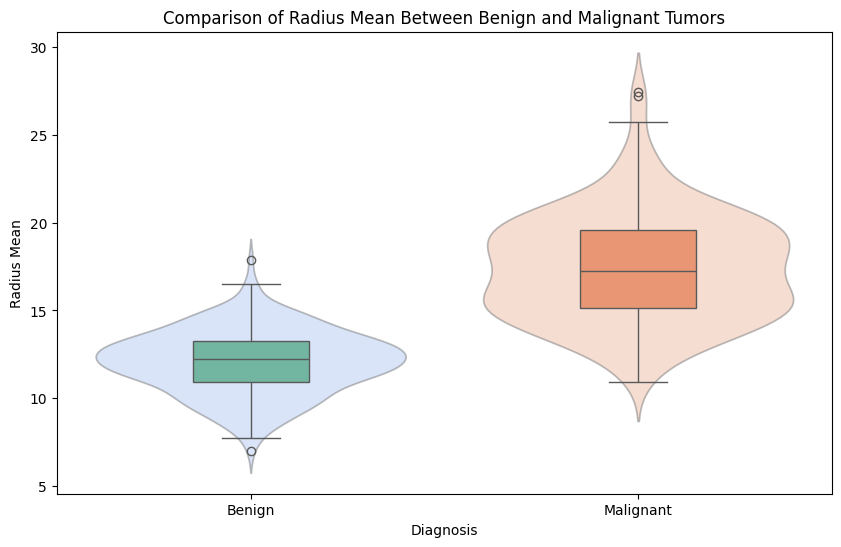

In [ ]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='diagnosis', y='radius_mean', data=df, palette='coolwarm', inner=None, alpha=0.5)
sns.boxplot(x='diagnosis', y='radius_mean', data=df, palette='Set2', width=0.3)

plt.title('Comparison of Radius Mean Between Benign and Malignant Tumors')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.ylabel('Radius Mean')
plt.xlabel('Diagnosis')
plt.show()


<ipython-input-21-cba959cb0c9a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y='perimeter_mean', data=df, palette='coolwarm', inner=None, alpha=0.5)
<ipython-input-21-cba959cb0c9a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='perimeter_mean', data=df, palette='Set2', width=0.3)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: F

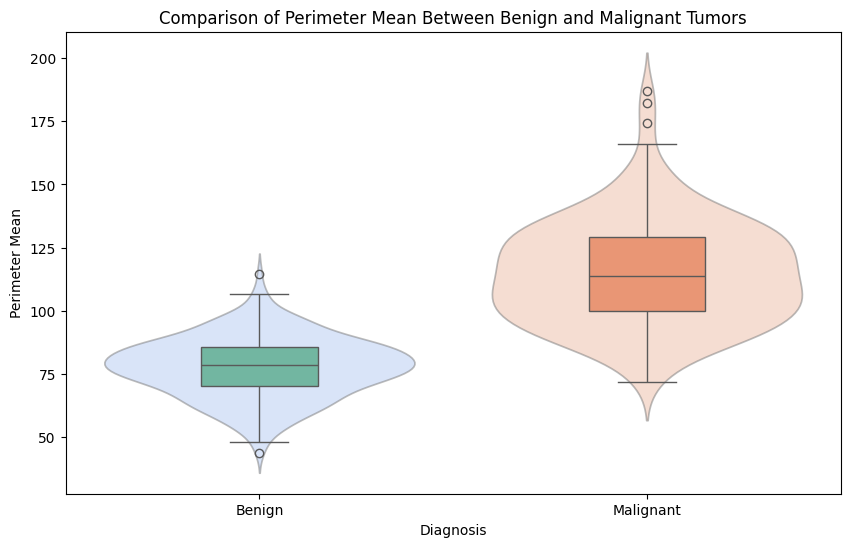

In [ ]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='diagnosis', y='perimeter_mean', data=df, palette='coolwarm', inner=None, alpha=0.5)
sns.boxplot(x='diagnosis', y='perimeter_mean', data=df, palette='Set2', width=0.3)

plt.title('Comparison of Perimeter Mean Between Benign and Malignant Tumors')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.ylabel('Perimeter Mean')
plt.xlabel('Diagnosis')
plt.show()

<ipython-input-22-aebeafce50db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y='concave points_mean', data=df, palette='coolwarm', inner=None, alpha=0.5)
<ipython-input-22-aebeafce50db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y='concave points_mean', data=df, palette='Set2', width=0.3)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical

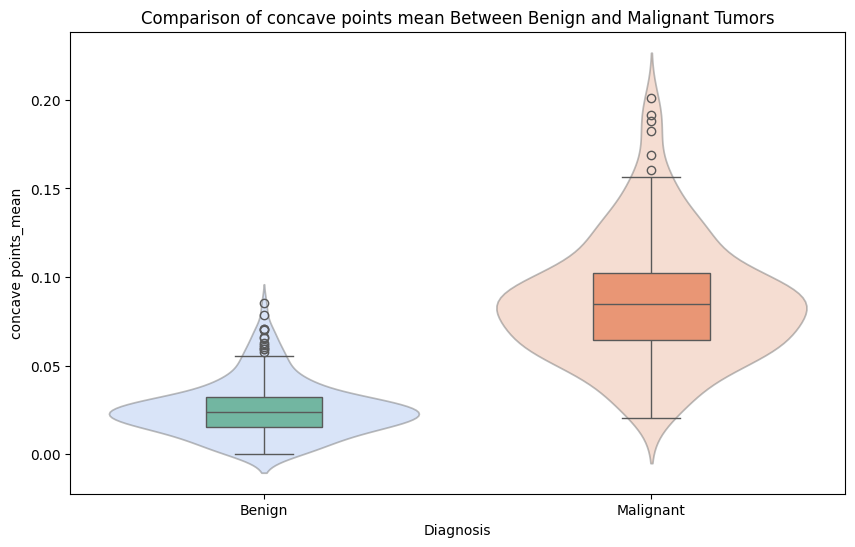

In [ ]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='diagnosis', y='concave points_mean', data=df, palette='coolwarm', inner=None, alpha=0.5)
sns.boxplot(x='diagnosis', y='concave points_mean', data=df, palette='Set2', width=0.3)

plt.title('Comparison of concave points mean Between Benign and Malignant Tumors')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.ylabel('concave points_mean')
plt.xlabel('Diagnosis')
plt.show()

<Axes: xlabel='radius_mean', ylabel='concave points_mean'>

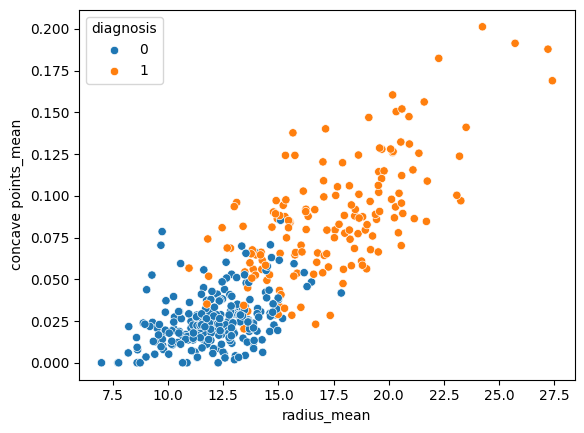

In [ ]:
sns.scatterplot(data=df, x='radius_mean', y='concave points_mean', hue='diagnosis')

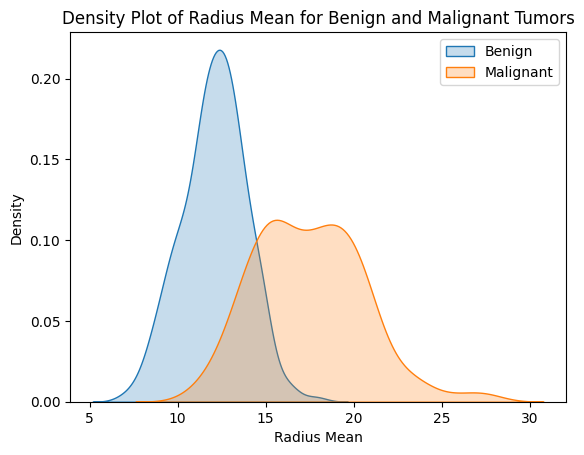

In [ ]:
sns.kdeplot(df[df['diagnosis'] == 0]['radius_mean'], label='Benign', fill=True)
sns.kdeplot(df[df['diagnosis'] == 1]['radius_mean'], label='Malignant', fill=True)
plt.title('Density Plot of Radius Mean for Benign and Malignant Tumors')
plt.xlabel('Radius Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

# **Model**

In [ ]:
X_train = df.drop(columns=['diagnosis'])
y_train = df['diagnosis']
X_test = test_df

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
selector = SelectFromModel(model, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_selected, y_train, test_size=0.2, random_state=42
)

In [ ]:
model.fit(X_train_split, y_train_split)


RandomForestClassifier()

In [ ]:
y_val_pred = model.predict(X_val_split)


# **Model Evaluation**

In [ ]:
accuracy_score(y_val_split, y_val_pred)

0.9375

In [ ]:
print(classification_report(y_val_split, y_val_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        57
           1       0.88      0.91      0.89        23

    accuracy                           0.94        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80



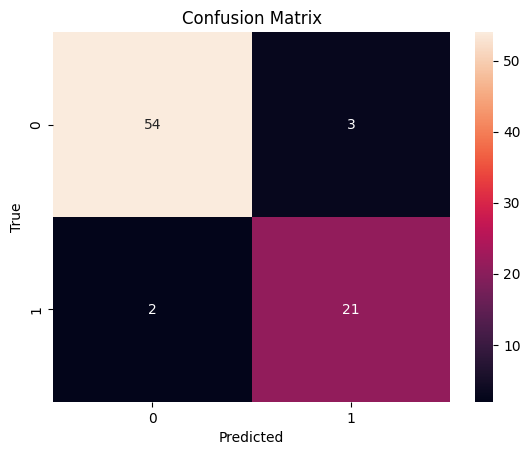

In [ ]:

cm = confusion_matrix(y_val_split, y_val_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
y_test_pred = model.predict(X_test_selected)

In [ ]:
y_test_pred_labels = ['B' if label == 0 else 'M' for label in y_test_pred]

submission = pd.DataFrame({
    'id': test_df_original['id'],
    'diagnosis': y_test_pred_labels
})

In [ ]:
submission.to_csv('submission.csv', index=False)

# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train_selected, y_train)
best_rf_model = random_search.best_estimator_

y_val_pred_2 = best_rf_model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_val_pred_2)
print(accuracy)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
0.9625


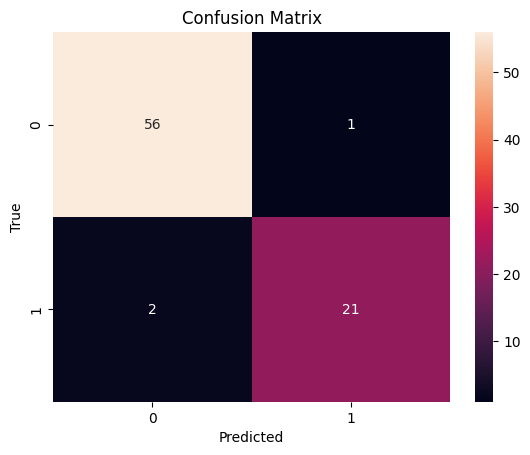

In [ ]:
cm = confusion_matrix(y_val_split, y_val_pred_2)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_val_split, y_val_pred_2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        57
           1       0.95      0.91      0.93        23

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.95        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
y_test_pred_2 = best_rf_model.predict(X_test_selected)

In [ ]:
y_test_pred_labels_2 = ['B' if label == 0 else 'M' for label in y_test_pred_2]

submission = pd.DataFrame({
    'id': test_df_original['id'],
    'diagnosis': y_test_pred_labels_2
})
submission.to_csv('submission.csv', index=False)